<IPython.core.display.Javascript object>


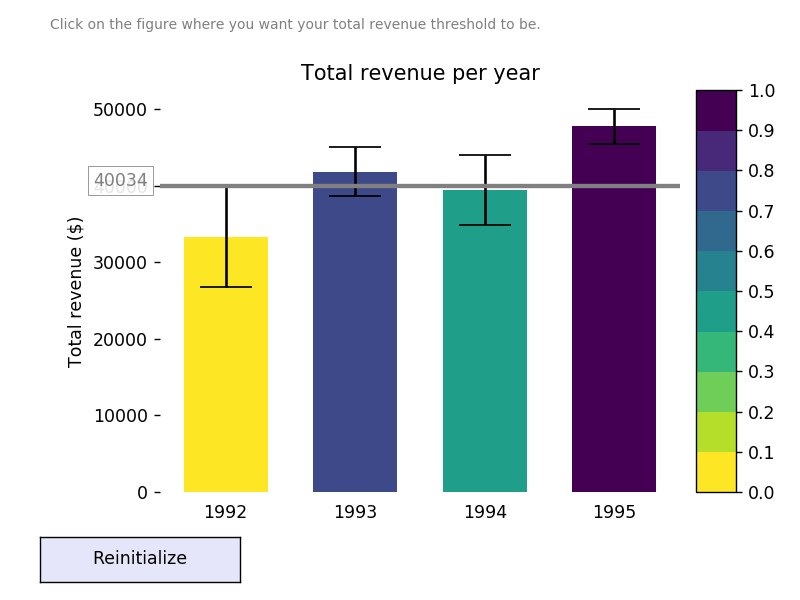

In [1]:
##-----------------------LIBRARY CALL----------------------------##
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib.widgets import Button

##------------------------FUNCTIONS------------------------------##

def plot_figure(color,pick):
    ax.clear()
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    ax.set_title('Total revenue per year')
    ax.set_ylabel('Total revenue ($)')
    
    ax.bar(desc.index,desc['mean'],width=0.65,
       tick_label =['1992','1993','1994','1995'],color=color,
       yerr=desc['err'],capsize=15)
    
    ax.axhline(y=pick,color='grey',linewidth=2.5)
    
    trans = mpl.transforms.blended_transform_factory(
        ax.get_yticklabels()[0].get_transform(), ax.transData)
    props = dict(boxstyle='square', facecolor='w', alpha=0.9,
                linewidth=0.5,edgecolor='grey')
    ax.text(0,pick, "{:.0f}".format(pick), color="grey", transform=trans, 
        ha="right", va="baseline", bbox=props)


def update(pick,cmap):    
    desc['prob']=1-(pick - desc['min limit'])/(2*desc['err'])
    color=cmap(desc['prob'])
    color=tuple(map(tuple, color.tolist()))
    plot_figure(color,pick)    


def onclick(event):
    pick=event.ydata
    update(pick,cmap)


##----------------------DATA GENERATION--------------------------##

np.random.seed(12345)

df = pd.DataFrame({'1992':np.random.normal(32000,200000,3650), 
                   '1993':np.random.normal(43000,100000,3650), 
                   '1994':np.random.normal(43500,140000,3650), 
                   '1995':np.random.normal(48000,70000,3650)})

desc=df.describe().T
desc.index = desc.index.astype(int) 
desc['err']=pd.DataFrame({'error':1.96*desc['std']/((len(df))**0.5)})
desc['min limit']=desc['mean']-desc['err']

##----------------------FIGURE CONSTRUCTION---------------------##

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.85,left=0.2,bottom=0.18,top=0.85)
plt.tick_params(axis='x',bottom=False)

#-----------Colorbar generation
cmap = cm.get_cmap('viridis_r', 10)
cax = plt.axes([0.87, 0.18, 0.05, 0.67])
cbar=mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                               orientation='vertical', drawedges=False)
cbar.set_ticks(np.arange(0.0,1.01,0.1))

#-----------First bar display
pick=0
update(pick,cmap)

#-----------Start interaction
cid=plt.gcf().canvas.mpl_connect('button_press_event', onclick)

#-----------Reinitialization button
but = plt.axes([0.05, 0.03, 0.25, 0.075])
button = Button(but, 'Reinitialize',color='lavender',
               hovercolor='lightyellow')
button.disconnect(cid)

#-----------Instruction text
inst=plt.text(0.05,12.3, 
              "Click on the figure where you want your total revenue threshold to be.",
              color="grey", ha="left", va="baseline", bbox=None,
              fontsize=8)

